In [1]:
from nilearn import datasets

# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First anatomical nifti image (3D) located is at: %s' %
      haxby_dataset.anat[0])
print('First functional nifti image (4D) is located at: %s' %
      haxby_dataset.func[0])

First anatomical nifti image (3D) located is at: /root/nilearn_data/haxby2001/subj2/anat.nii.gz
First functional nifti image (4D) is located at: /root/nilearn_data/haxby2001/subj2/bold.nii.gz


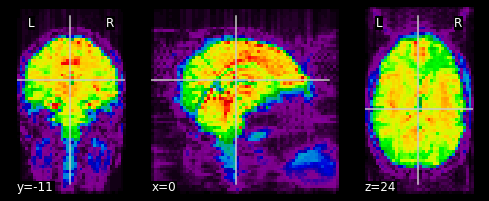

In [2]:
from nilearn.image.image import mean_img

# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = haxby_dataset.func[0]
mean_haxby = mean_img(func_filename)

from nilearn.plotting import plot_epi, show
plot_epi(mean_haxby)

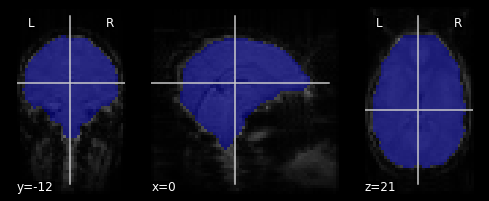

In [17]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(func_filename)

# visualise as ROI
from nilearn.plotting import plot_roi
plot_roi(mask_img, mean_haxby)

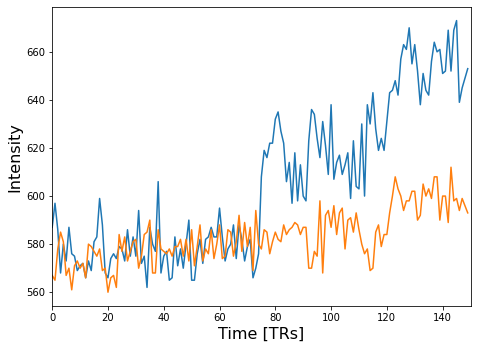

In [18]:
from nilearn.masking import apply_mask
masked_data = apply_mask(func_filename, mask_img)

# masked_data shape is (timepoints, voxels)
# We are plotting first 150 timepoints from two voxels

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(masked_data[:150,:2])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0,150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

show()